<a href="https://colab.research.google.com/github/aniruddhha/100-days-of-ml/blob/main/diabetes_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [319]:
import pandas as pd
import numpy as np

In [320]:
df = pd.read_csv('./sample_data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [321]:
df['Outcome'].value_counts()[0], df['Outcome'].value_counts()[1]

(500, 268)

In [322]:
import seaborn as sns

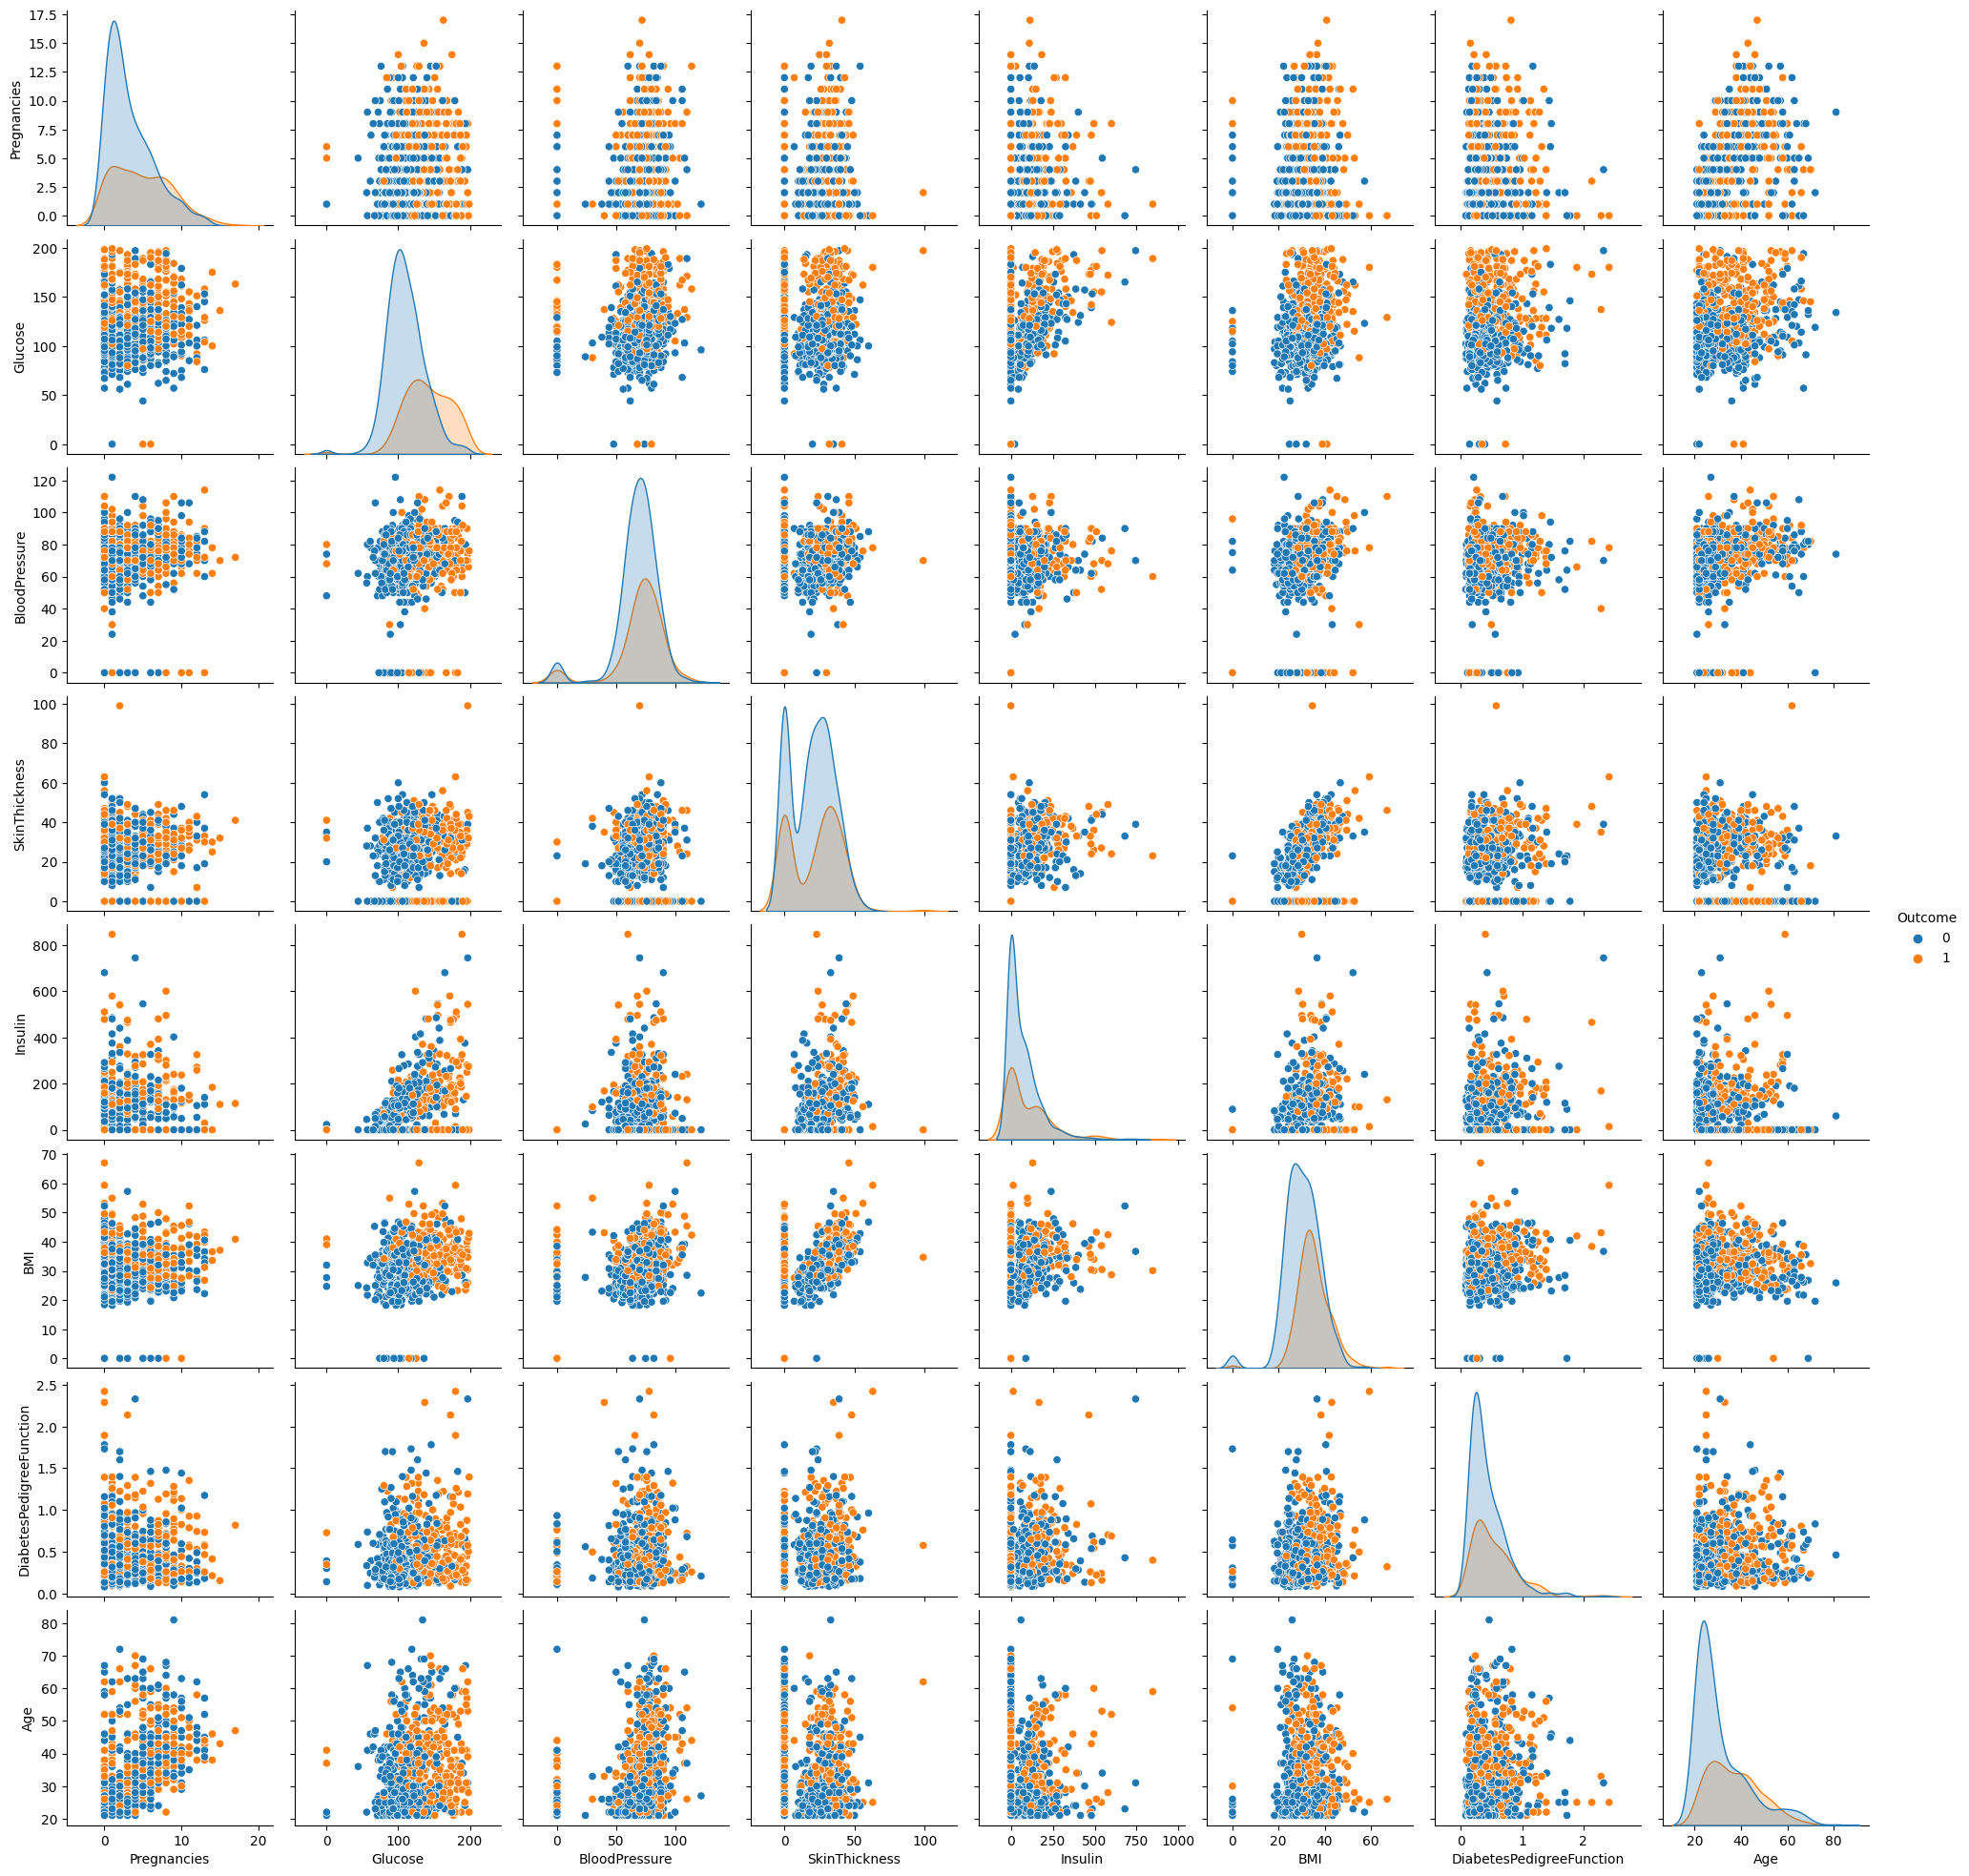

In [323]:
sns.pairplot(df, hue='Outcome')

In [324]:
X = df.drop('Outcome', axis = 1).values
y = df['Outcome'].values

In [325]:
from sklearn.model_selection import train_test_split

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [327]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [328]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [329]:
class DiabetesModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_relu_stack = nn.Sequential(
            nn.Linear(8, 3),
            nn.ReLU(),
            nn.Linear(3, 3),
            nn.ReLU(),
            nn.Linear(3, 3),
            nn.ReLU(),
            # nn.Linear(150, 10),
            # nn.ReLU(),
            # nn.Linear(10, 10),
            # nn.ReLU(),
            nn.Linear(3, 2)
    )
  def forward(self, x):
    # x = F.relu(self.f_connected3(x))
    logits = self.linear_relu_stack(x)
    return logits


In [330]:
torch.manual_seed(42)
model = DiabetesModel()

In [331]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [332]:
def train(epochs):
  losses = []
  for i in range(epochs):
    i = i + 1
    y_pred = model(X_train)
    loss = loss_function(y_pred, y_train)
    losses.append(loss)
    if((i % 10) == 1):
      print(f'Epoch Number {i} and Loss {loss.item()}')
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
   
  return losses

In [333]:
epochs = 300
losses = train(epochs)

Epoch Number 1 and Loss 3.569139003753662
Epoch Number 11 and Loss 0.7549055814743042
Epoch Number 21 and Loss 0.712486982345581
Epoch Number 31 and Loss 0.6906257271766663
Epoch Number 41 and Loss 0.6748366951942444
Epoch Number 51 and Loss 0.6633976101875305
Epoch Number 61 and Loss 0.6551449298858643
Epoch Number 71 and Loss 0.6494943499565125
Epoch Number 81 and Loss 0.6456193923950195
Epoch Number 91 and Loss 0.6428648829460144
Epoch Number 101 and Loss 0.6408601999282837
Epoch Number 111 and Loss 0.6393250823020935
Epoch Number 121 and Loss 0.6380990147590637
Epoch Number 131 and Loss 0.6370542645454407
Epoch Number 141 and Loss 0.6361191272735596
Epoch Number 151 and Loss 0.6352362632751465
Epoch Number 161 and Loss 0.6343872547149658
Epoch Number 171 and Loss 0.6337081789970398
Epoch Number 181 and Loss 0.6329395174980164
Epoch Number 191 and Loss 0.6323437690734863
Epoch Number 201 and Loss 0.6316354274749756
Epoch Number 211 and Loss 0.6310003399848938
Epoch Number 221 and Lo

In [334]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epochs')

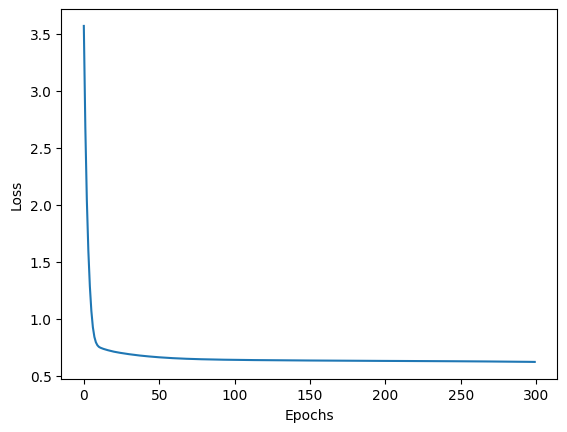

In [335]:
fi_los = [fl.item() for fl in losses ]
plt.plot(range(epochs), fi_los)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [336]:
def test(): 
  predictions = []

  with torch.no_grad():
    for i, data in enumerate(X_test):
      y_pred = model(data)
      predictions.append(y_pred.argmax().item())

  return predictions

In [337]:
preds = test()
#preds

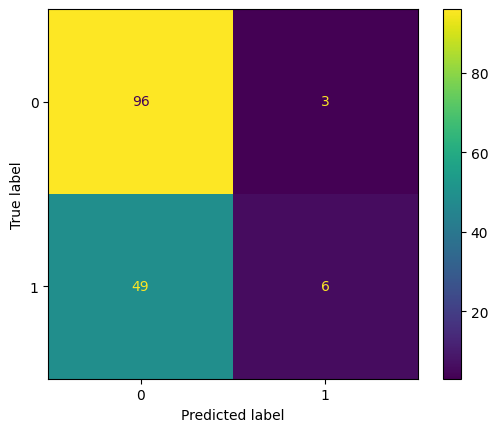

In [338]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(cm).plot()

In [339]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, preds)
score

0.6623376623376623

In [340]:
X_test

tensor([[  6.0000,  98.0000,  58.0000,  ...,  34.0000,   0.4300,  43.0000],
        [  2.0000, 112.0000,  75.0000,  ...,  35.7000,   0.1480,  21.0000],
        [  2.0000, 108.0000,  64.0000,  ...,  30.8000,   0.1580,  21.0000],
        ...,
        [  8.0000,  95.0000,  72.0000,  ...,  36.8000,   0.4850,  57.0000],
        [  2.0000, 146.0000,  70.0000,  ...,  28.0000,   0.3370,  29.0000],
        [  8.0000,  74.0000,  70.0000,  ...,  35.3000,   0.7050,  39.0000]])

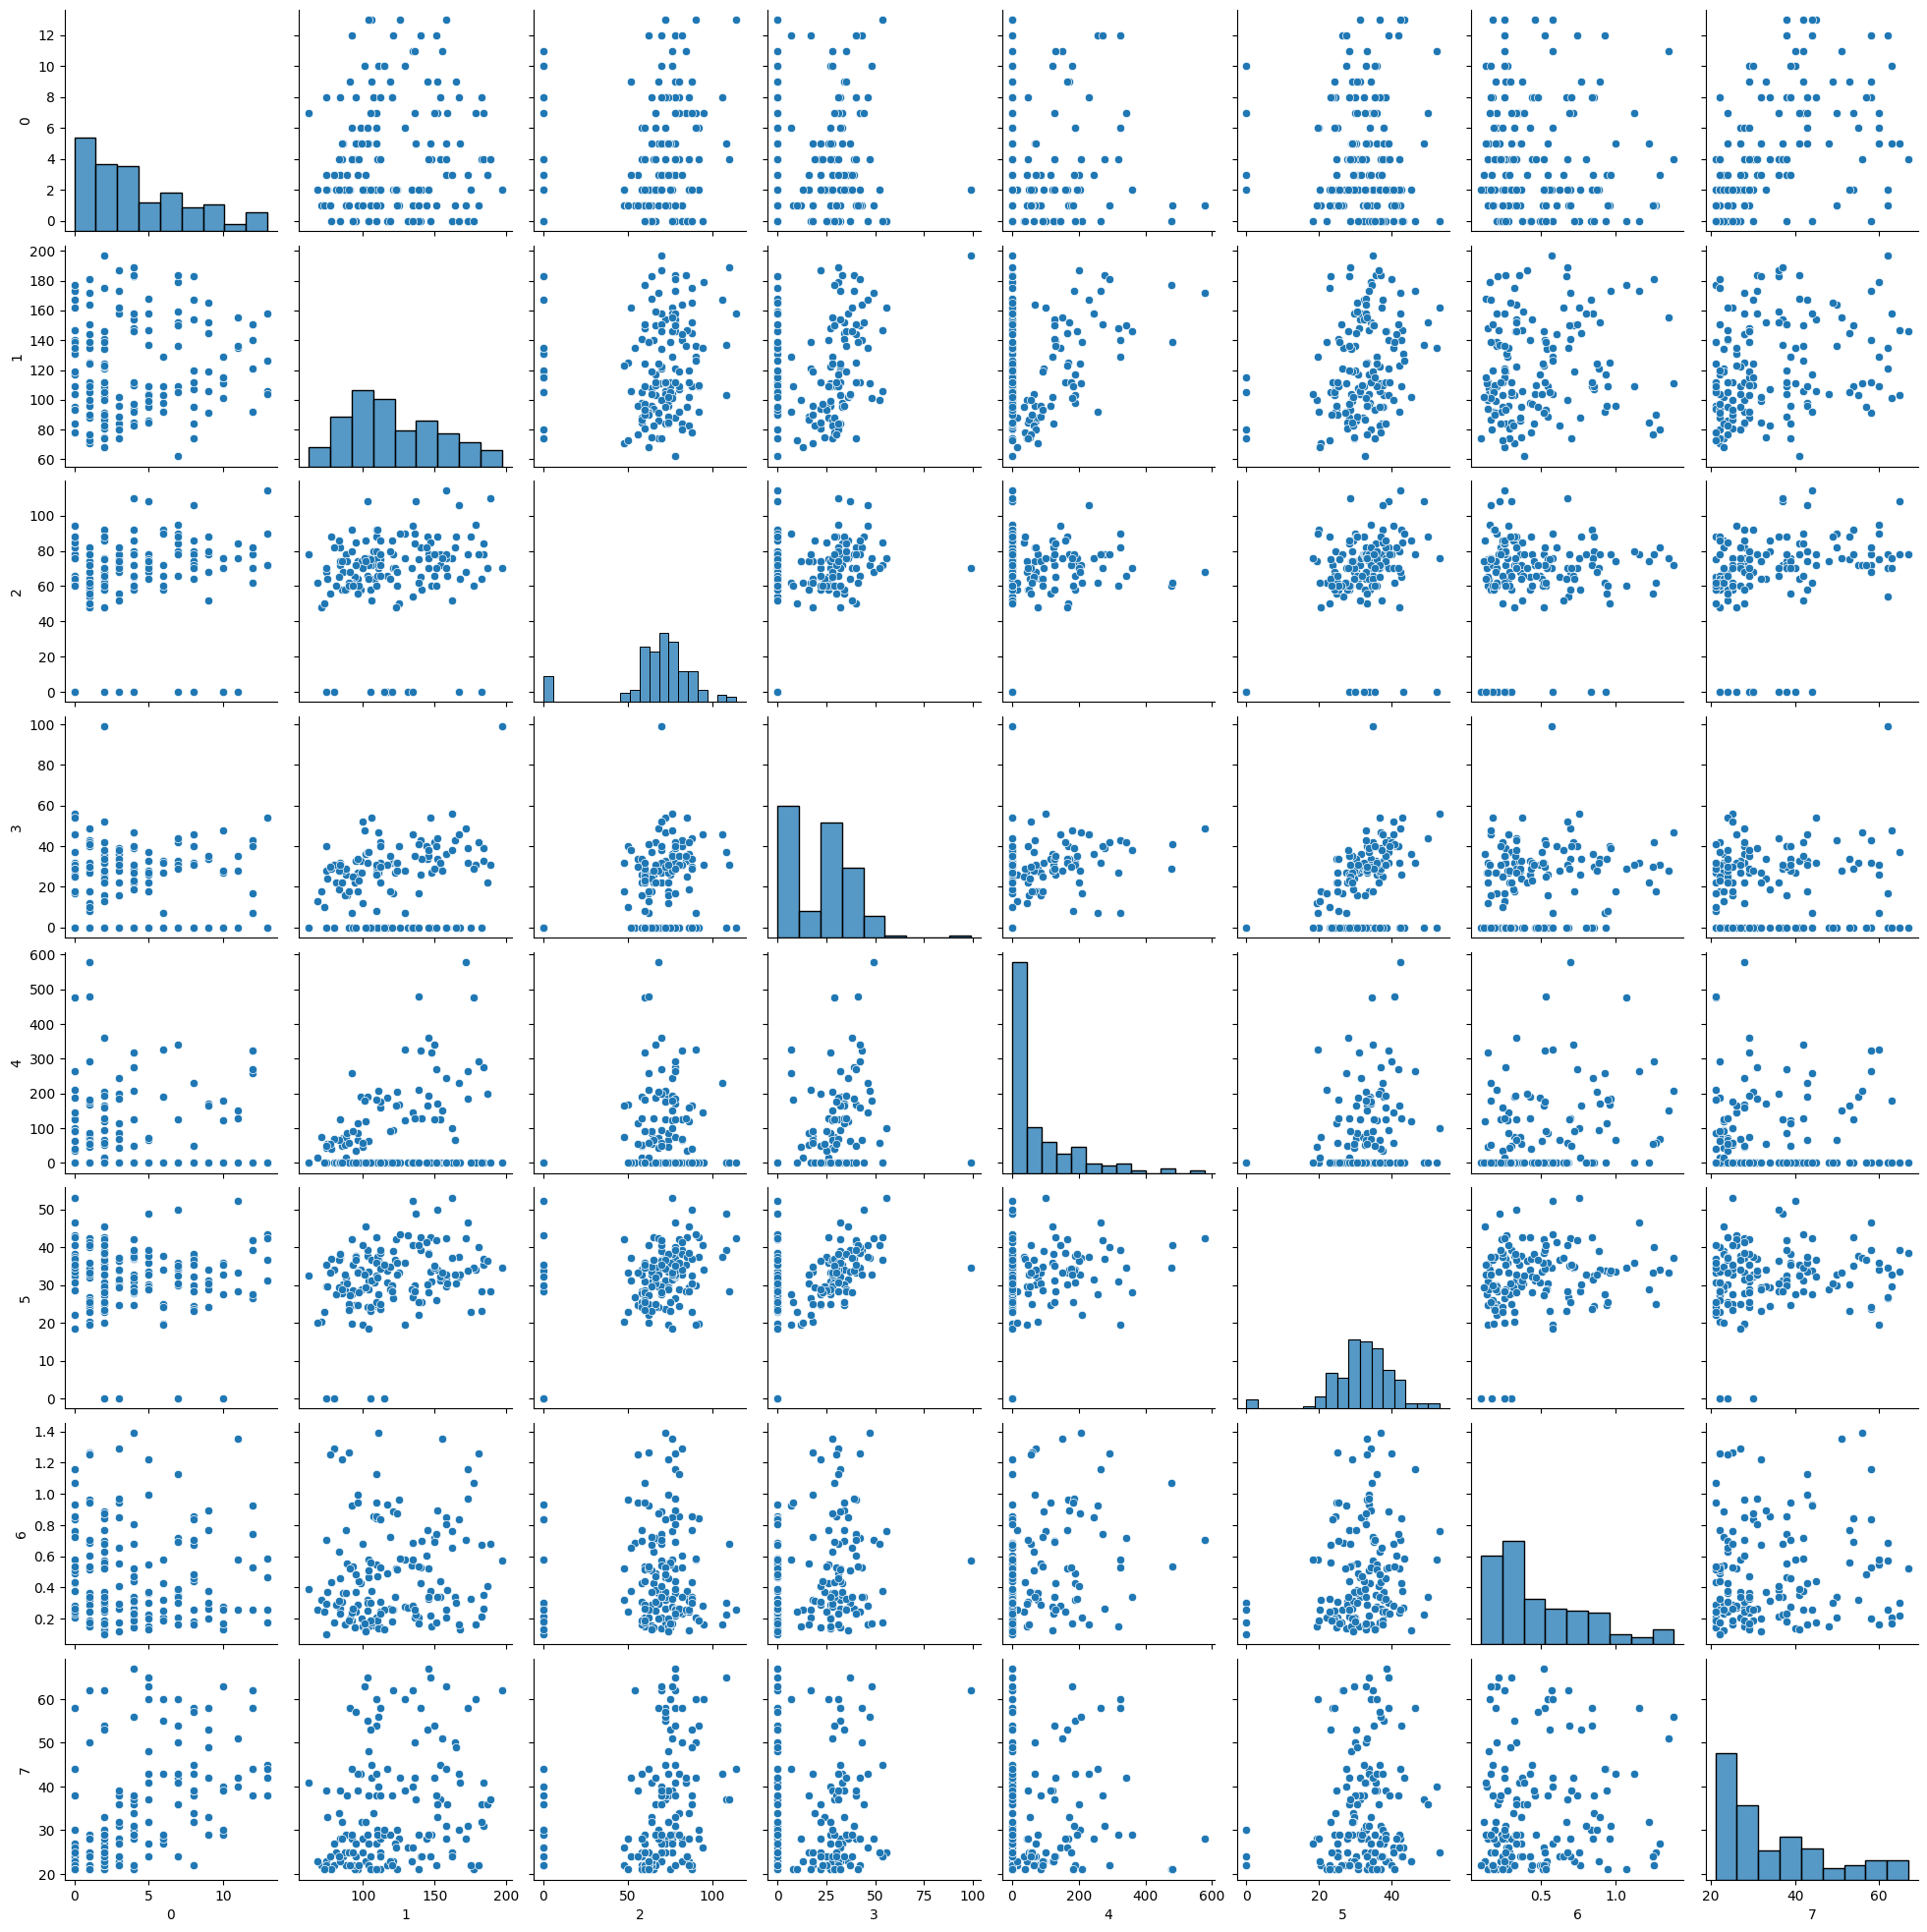

In [341]:
sns.pairplot(pd.DataFrame(X_test.numpy()))

In [342]:
F.normalize(X_test)

tensor([[0.0260, 0.4249, 0.2515,  ..., 0.1474, 0.0019, 0.1864],
        [0.0138, 0.7745, 0.5186,  ..., 0.2469, 0.0010, 0.1452],
        [0.0153, 0.8246, 0.4887,  ..., 0.2352, 0.0012, 0.1603],
        ...,
        [0.0582, 0.6915, 0.5240,  ..., 0.2678, 0.0035, 0.4149],
        [0.0050, 0.3663, 0.1756,  ..., 0.0702, 0.0008, 0.0728],
        [0.0610, 0.5641, 0.5336,  ..., 0.2691, 0.0054, 0.2973]])

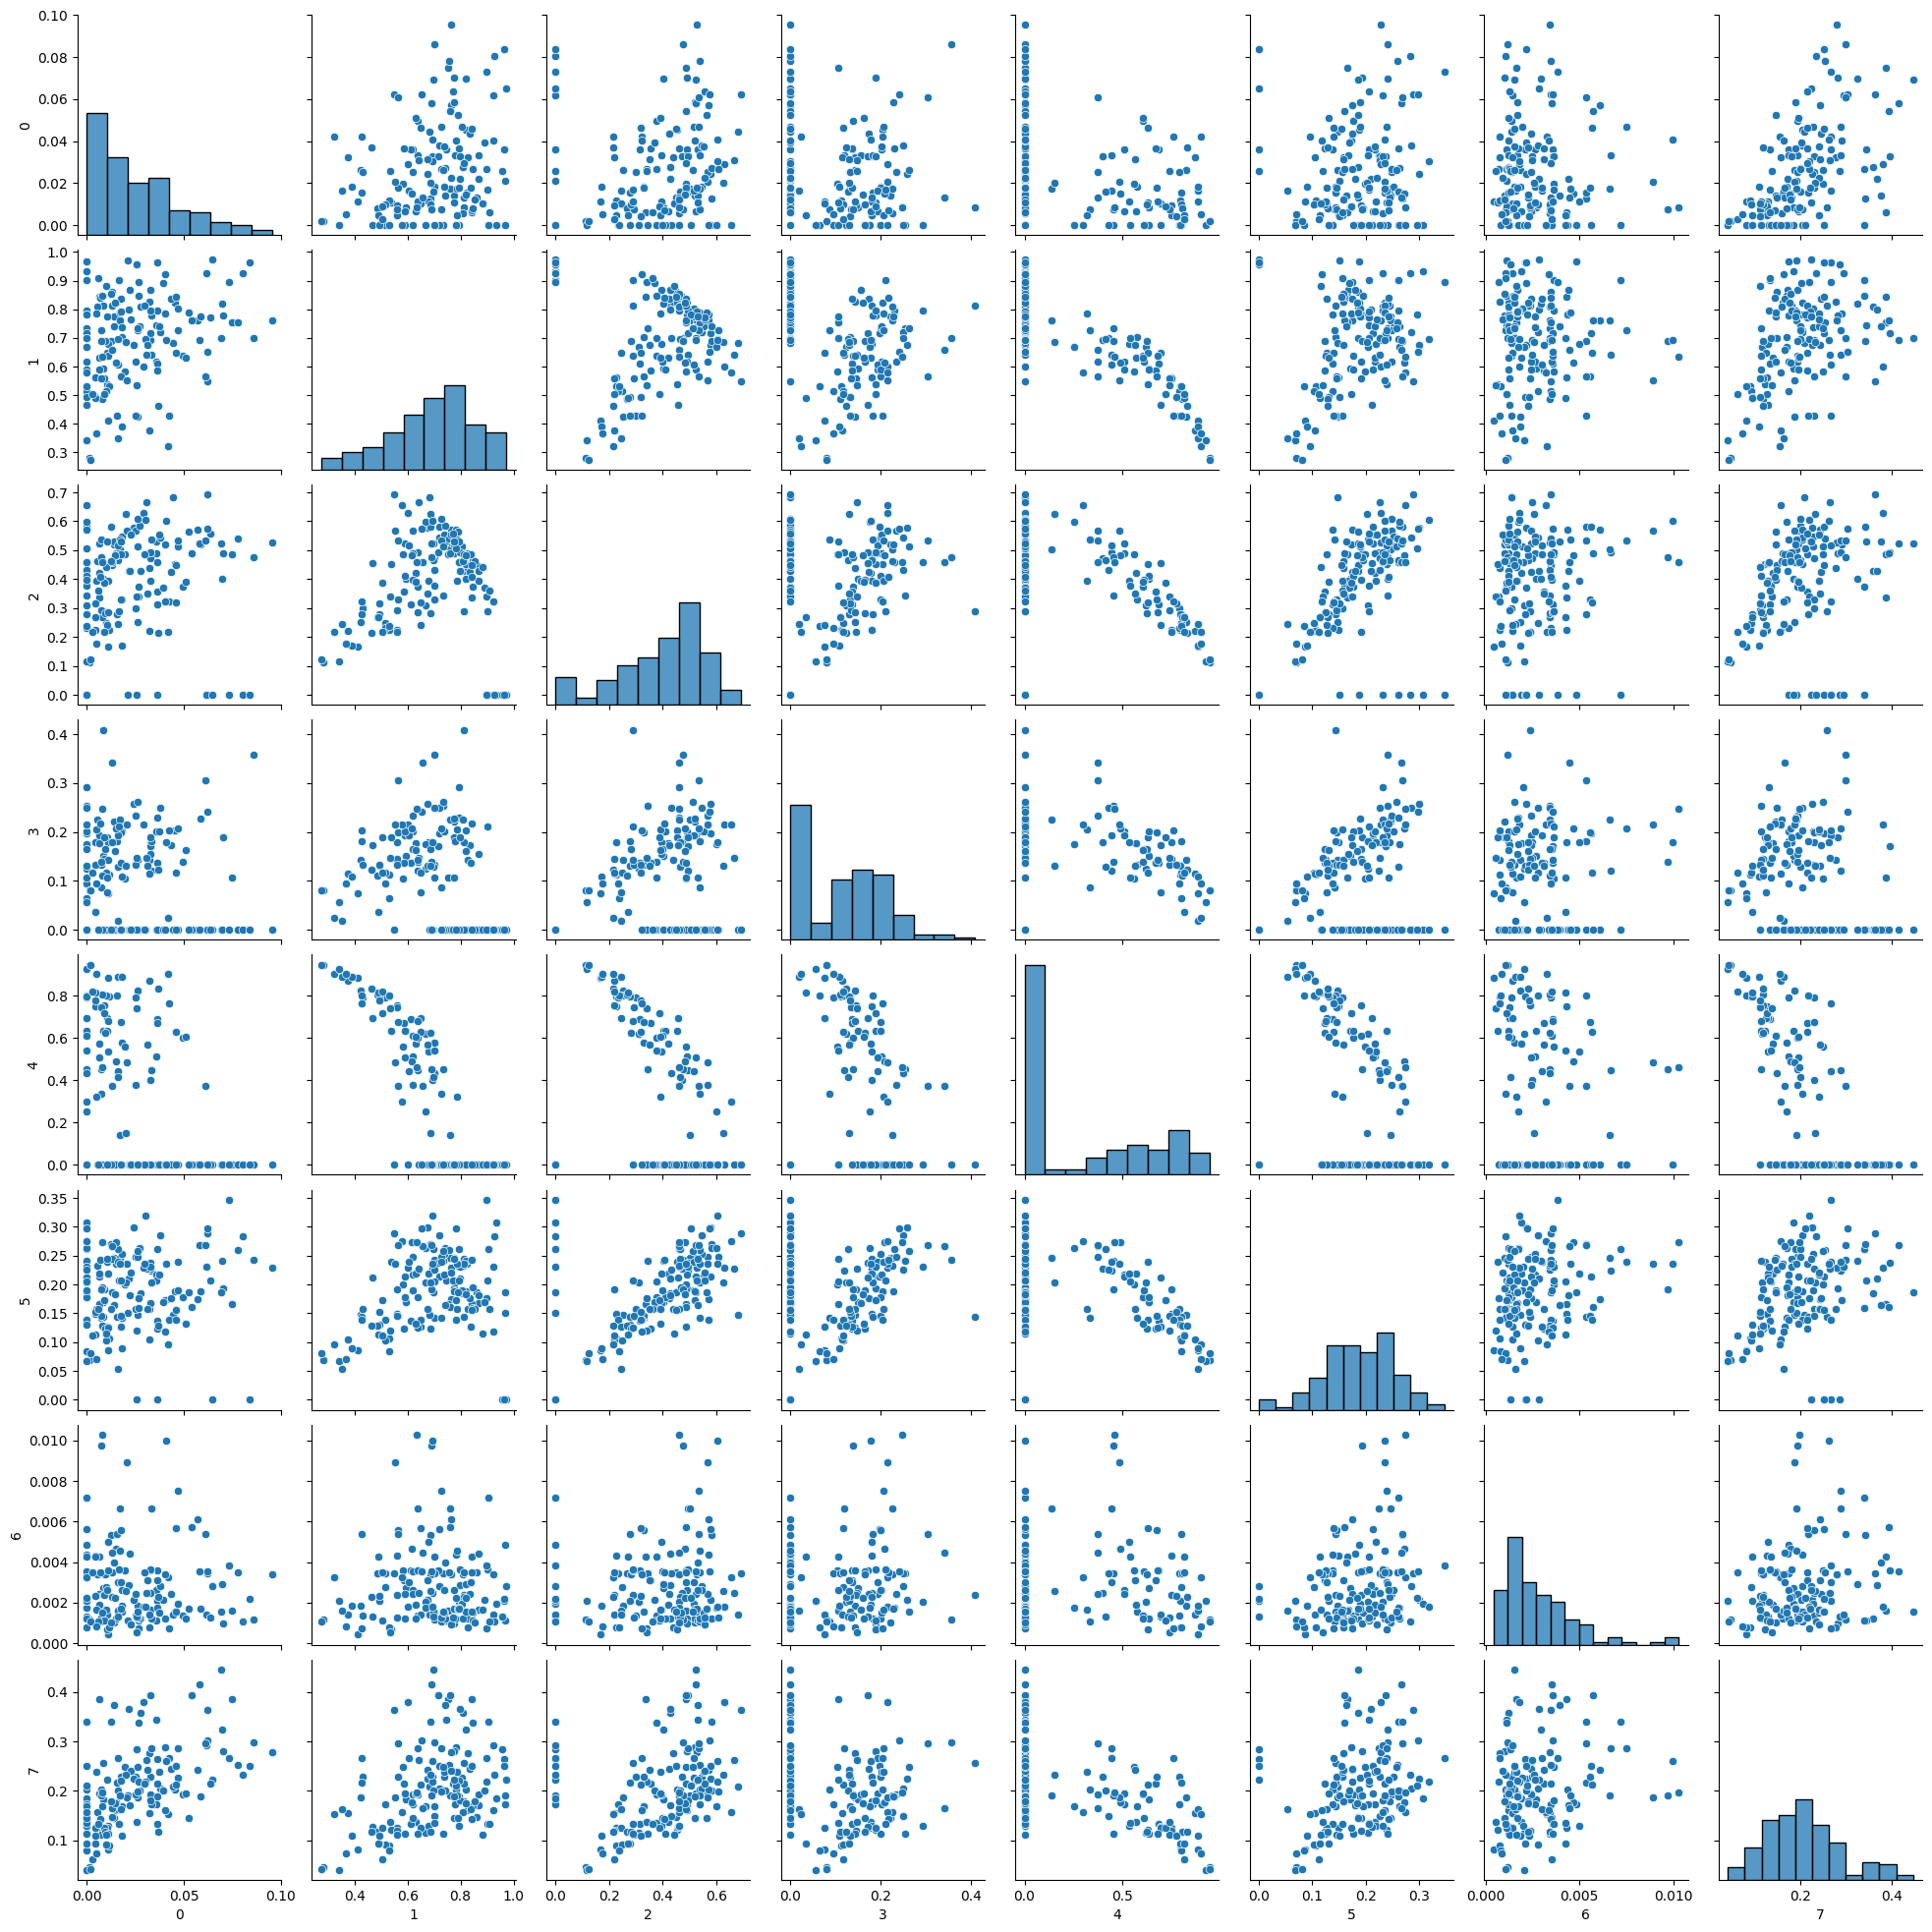

In [344]:
sns.pairplot(pd.DataFrame(F.normalize(X_test).numpy()))